# Assignment 3 Part 2
## Diffusion Model

## Setup Code
Before getting started, we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the autoreload extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
# For Google Colab, commented out since running locally
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/MyDrive/A3_PartB/  #Use correct path
# !pwd

In [1]:
# Verify the AFHQ dataset is present
import os

data_path = './data/train'
if os.path.exists(data_path):
    print("✅ Dataset found!")
    print(f"📁 Data structure:")
    for category in ['cat', 'dog', 'wild']:
        cat_path = os.path.join(data_path, category)
        if os.path.exists(cat_path):
            num_images = len([f for f in os.listdir(cat_path) if f.endswith(('.jpg', '.png'))])
            print(f"   - {category}: {num_images} images")
else:
    print("❌ Dataset not found at ./data/train")
    print("Please download the AFHQ dataset manually and place it in the ./data folder")

✅ Dataset found!
📁 Data structure:
   - cat: 5065 images
   - dog: 4678 images
   - wild: 4593 images


In [4]:
# # Download the dataset afhq_v2.zip (6.48G)
# !mkdir -p ./data
# !gdown --id 1-1npXlqCw1CYQ5SBbrlSgZdA9TEwZre4 -O ./data/afhq_v2.zip #Using gdown to get the data from Google Drive location
# !unzip -q ./data/afhq_v2.zip -d ./data

In [1]:
# Download the dataset afhq_v2.zip (6.48G) - OR use the one provided in the data folder
!mkdir -p /content/data
!wget -N https://www.dropbox.com/s/vkzjokiwof5h8w6/afhq_v2.zip?dl=0 -O /content/data/afhq_v2.zip
!unzip -q /content/data/afhq_v2.zip -d /content/data

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# # Set up the environment
!pip install -r requirements.txt

In [3]:
# Check CUDA availability and usage
import torch

print("=== CUDA Status ===")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
print(f"PyTorch version: {torch.__version__}")

if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
    print(f"CUDA device memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("WARNING: CUDA not available - training on CPU!")

=== CUDA Status ===
CUDA available: True
CUDA version: 12.6
PyTorch version: 2.6.0+cu126
CUDA device count: 1
Current CUDA device: 0
CUDA device name: NVIDIA GeForce RTX 4080 Laptop GPU
CUDA device memory: 12.88 GB


In [1]:
# PART 1: Training - Wandb handles all tracking
import subprocess
import sys
import os

process = subprocess.Popen(
    [sys.executable, '-u', 'main.py',
     '--data_path', './data/train',
     '--save_folder', './results',
     '--data_class', 'cat',
     '--time_steps', '50',
     '--train_steps', '1000',
     '--image_size', '32',
     '--batch_size', '32',
     '--learning_rate', '1e-3',
     '--unet_dim', '16',
     '--save_and_sample_every', '100'],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    encoding='utf-8',
    errors='replace'
)

for line in iter(process.stdout.readline, ''):
    if line:
        print(line, end='', flush=True)

return_code = process.wait()

if return_code == 0:
    print("\n✅ Training completed! Check wandb for details")
else:
    print(f"\n❌ Training failed with error code: {return_code}")

Namespace(time_steps=50, train_steps=1000, save_folder='./results', data_path='./data/train', load_path=None, data_class='cat', image_size=32, batch_size=32, learning_rate=0.001, unet_dim=16, unet_dim_mults=[1, 2, 4, 8], fid=False, save_and_sample_every=100, visualize=False)
wandb: Currently logged in as: dhairya28m (dhairya28m-nyu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.
wandb: Tracking run with wandb version 0.23.0
wandb: Run data is saved locally in c:\--DPM-MAIN-DIR--\windsurf_projects\Variational-Autoencoder-and-Diffusion-Models-on-Animal-Faces-HQ-dataset__CVA_3\A3_PartB\A3_PartB\wandb\run-20251128_032408-av4ansgi
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run results
wandb:  View project at https://wandb.ai/dhairya28m-nyu/DDPM_AFHQ
wandb:  View run at https://wandb.ai/dhairya28m-nyu/DDPM_AFHQ/runs/av4ansgi
dataset l

In [ ]:
# PART 1: Training - Live streaming output
import subprocess
import sys
import os

# Ensure we're in the correct directory  
script_dir = os.path.dirname(os.path.abspath("__file__"))  # Or use the actual path
os.chdir(script_dir)

process = subprocess.Popen(
    [sys.executable, '-u', 'main.py',
     '--data_path', './data/train',
     '--save_folder', './results_part1',
     '--data_class', 'cat',
     '--time_steps', '100',
     '--train_steps', '1000',
     '--image_size', '32',
     '--batch_size', '32',
     '--learning_rate', '0.002',  # 2e-3
     '--unet_dim', '16',
     '--save_and_sample_every', '100'
     ],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    encoding='utf-8',
    errors='replace'
)

for line in iter(process.stdout.readline, ''):
    if line:
        print(line, end='', flush=True)

return_code = process.wait()

if return_code == 0:
    print("\n✅ Part 1 Training completed! Check wandb for loss curve")
else:
    print(f"\n❌ Training failed with error code: {return_code}")

In [2]:
# Plot Loss from Latest Wandb Run
import matplotlib.pyplot as plt
import json
from pathlib import Path

wandb_dir = Path("wandb")

if not wandb_dir.exists():
    print("ERROR: No wandb directory found - run training first")
    exit()

# Find latest run
all_runs = list(wandb_dir.glob("run-*")) + list(wandb_dir.glob("offline-run-*"))

if not all_runs:
    print("ERROR: No wandb runs found")
    exit()

latest_run = max(all_runs, key=lambda x: x.stat().st_mtime)
print(f"Using run: {latest_run.name}")

# Read history
history_file = latest_run / "files" / "wandb-history.jsonl"

if history_file.exists():
    steps = []
    losses = []
    
    print("Found wandb-history.jsonl - reading full training history...")
    with open(history_file, 'r') as f:
        for line_num, line in enumerate(f):
            if line.strip():
                data = json.loads(line)
                if 'loss' in data:
                    steps.append(data.get('_step', line_num))
                    losses.append(data['loss'])
    
    if losses:
        # Plot full history
        plt.figure(figsize=(12, 6))
        plt.plot(steps, losses, '-', color='#2E86AB', linewidth=2, alpha=0.8)
        plt.scatter(steps, losses, s=20, color='#A23B72', alpha=0.6, zorder=5)
        
        plt.xlabel('Training Steps', fontsize=12, fontweight='bold')
        plt.ylabel('Loss', fontsize=12, fontweight='bold')
        plt.title(f'Part 1: Training Loss over {len(losses)} Steps', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # Add final loss annotation
        plt.annotate(f'Final: {losses[-1]:.4f}', 
                    xy=(steps[-1], losses[-1]), 
                    xytext=(10, 10), 
                    textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                    fontsize=10,
                    fontweight='bold')
        
        # Save to results
        results_dir = Path("./results")
        results_dir.mkdir(exist_ok=True)
        filename = results_dir / "loss_plot.png"
        
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"\nPlot saved: {filename}")
        print(f"Total steps: {len(steps)}")
        print(f"Initial loss: {losses[0]:.4f}")
        print(f"Final loss: {losses[-1]:.4f}")
        print(f"Loss reduction: {((losses[0] - losses[-1]) / losses[0] * 100):.1f}%")
    else:
        print("WARNING: No loss data found in history file")
else:
    print("WARNING: No wandb-history.jsonl found")
    print("Run training to generate loss data")

print("\nPart 1 visualization complete!")


Using run: run-20251128_032408-av4ansgi
Run training to generate loss data

Part 1 visualization complete!


📊 Reading run: 9b705jq6
✅ Found 100 loss values
   Loss: 0.022763 → 0.863485


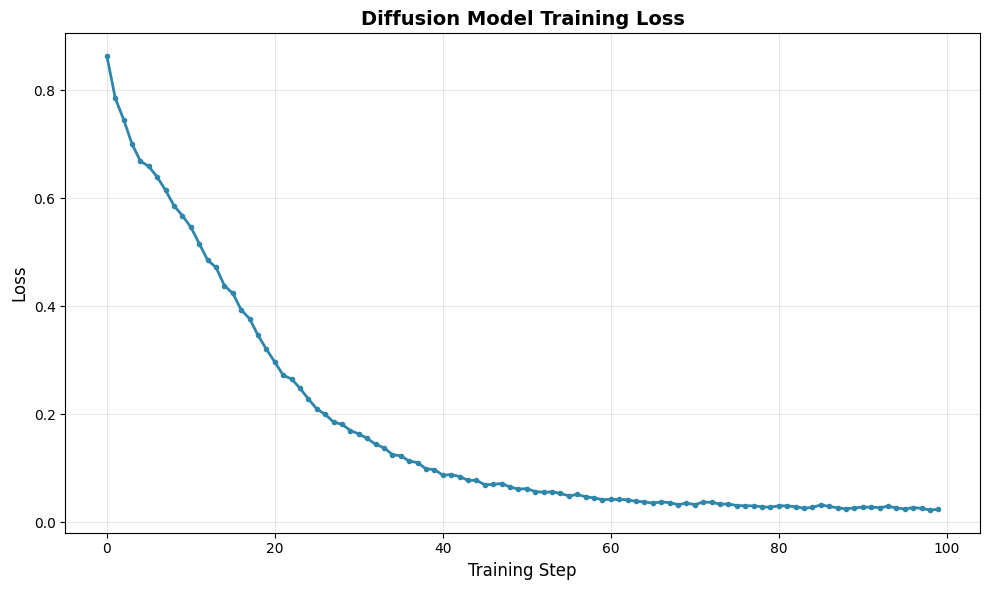

✅ Plot saved to: training_loss.png


PART 1: Training Loss and Sample Visualization

[1/3] Checking for wandb data...
Found run: run-20251128_032408-av4ansgi
Found summary data only
  Final loss: 0.2045 at step 999


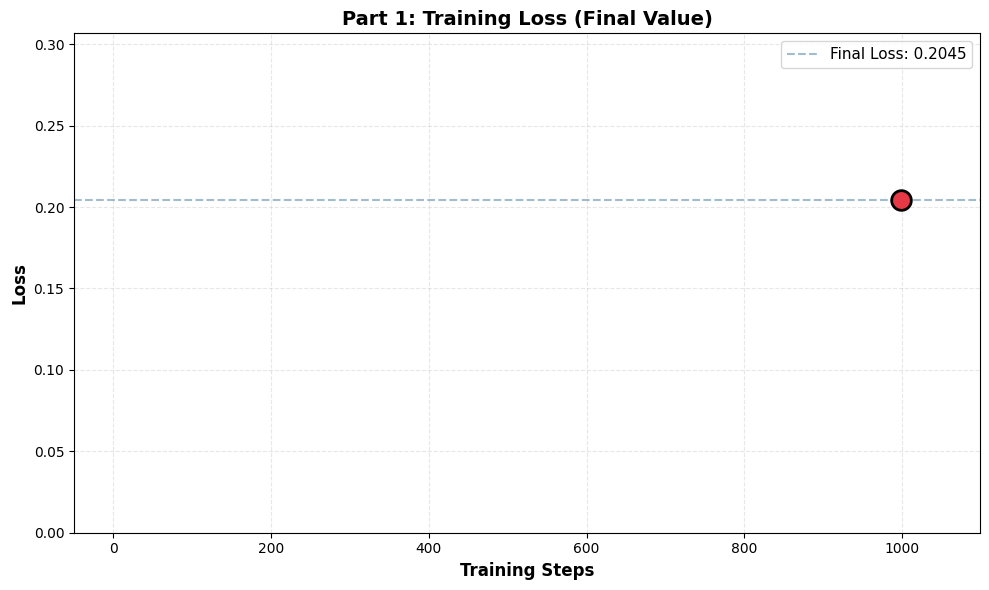

  Saved: training_loss.png

[2/3] Checking for generated samples...
Found sample: sample_9.png


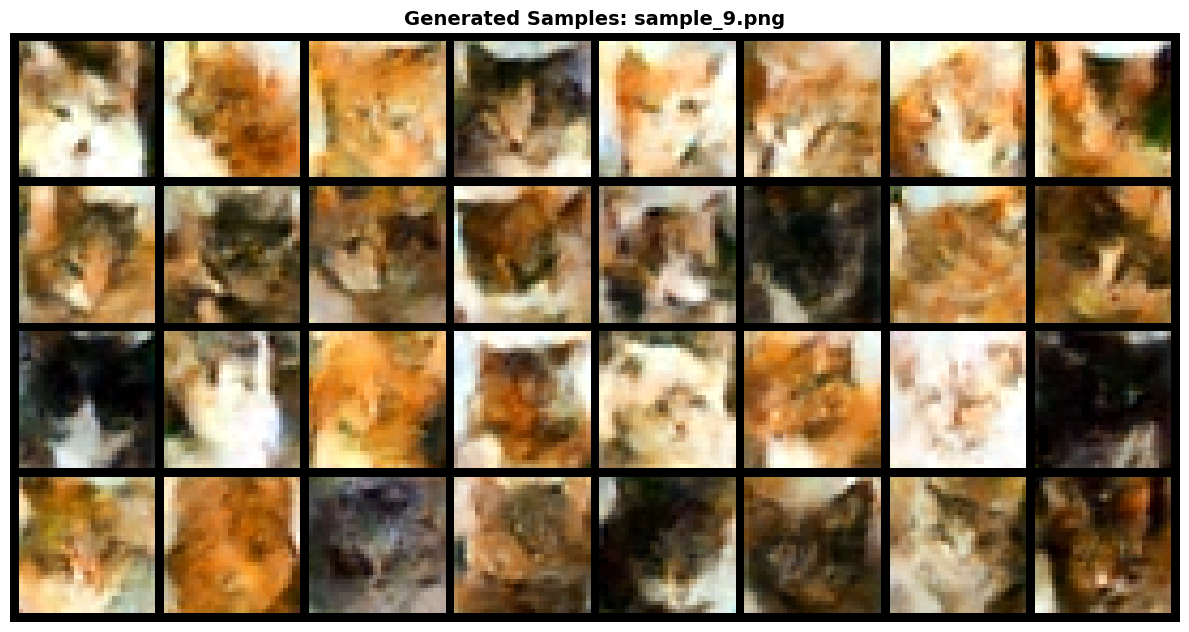

  Saved: generated_samples.png
  Image size: (274, 138)

[3/3] Checking for individual samples...
Found 16 samples in sample_ddpm_9


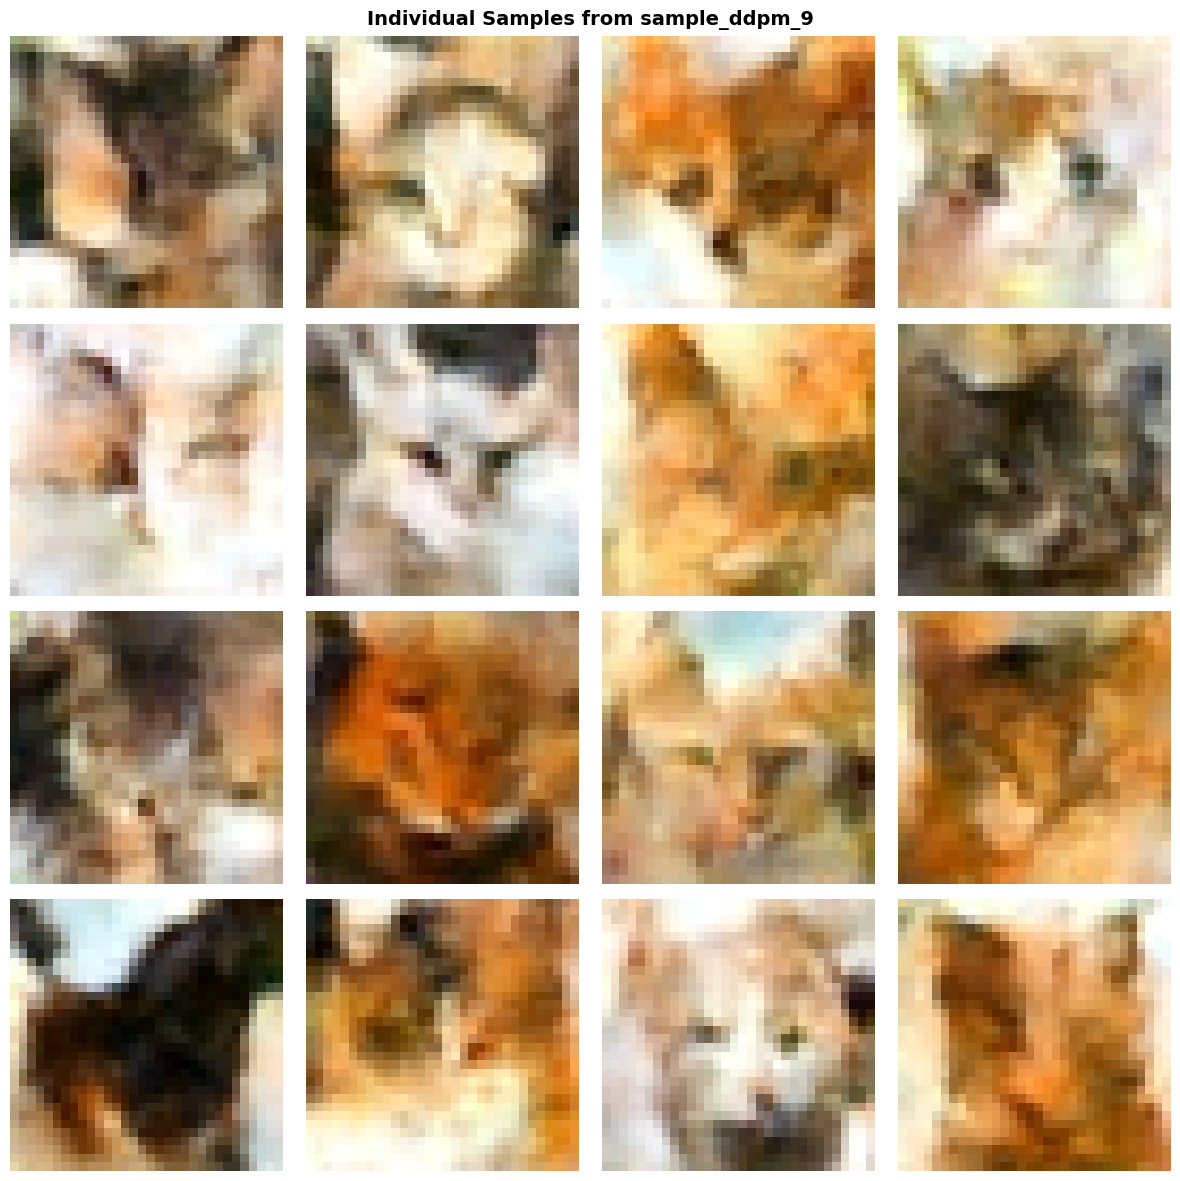

  Saved: individual_samples_grid.png

SUMMARY
Generated files:
  - training_loss.png
  - generated_samples.png
  - individual_samples_grid.png


In [3]:
# ============================================================
# PART 1: Plot Training Loss AND Display Sample Images
# Robust version that handles missing data gracefully
# ============================================================

import matplotlib.pyplot as plt
import json
from pathlib import Path
import os

print("="*60)
print("PART 1: Training Loss and Sample Visualization")
print("="*60)

# ============================================
# PART A: Plot Training Loss from Wandb
# ============================================

print("\n[1/3] Checking for wandb data...")

wandb_dir = Path("./wandb")

if not wandb_dir.exists():
    print("WARNING: No wandb directory found")
    print("  This means training data was not saved or was deleted")
    print("  Solution: Re-run training to generate new data")
else:
    # Find latest run
    all_runs = list(wandb_dir.glob("run-*")) + list(wandb_dir.glob("offline-run-*"))
    
    if not all_runs:
        print("WARNING: No wandb runs found in ./wandb/")
    else:
        latest_run = max(all_runs, key=lambda x: x.stat().st_mtime)
        print(f"Found run: {latest_run.name}")
        
        # Try to read summary
        summary_file = latest_run / "files" / "wandb-summary.json"
        history_file = latest_run / "files" / "wandb-history.jsonl"
        
        if history_file.exists():
            # Read full history
            steps = []
            losses = []
            
            with open(history_file, 'r') as f:
                for line in f:
                    if line.strip():
                        data = json.loads(line)
                        if 'loss' in data:
                            steps.append(data.get('_step', len(steps)))
                            losses.append(data['loss'])
            
            if losses:
                print(f"SUCCESS: Found {len(losses)} loss values")
                
                # Plot full history
                plt.figure(figsize=(12, 6))
                plt.plot(steps, losses, '-', color='#2E86AB', linewidth=2, alpha=0.8)
                plt.scatter(steps, losses, s=20, color='#A23B72', alpha=0.6, zorder=5)
                
                plt.xlabel('Training Steps', fontsize=12, fontweight='bold')
                plt.ylabel('Loss', fontsize=12, fontweight='bold')
                plt.title('Part 1: Training Loss over Training Steps', fontsize=14, fontweight='bold')
                plt.grid(True, alpha=0.3, linestyle='--')
                
                # Add annotation
                plt.annotate(f'Final: {losses[-1]:.4f}', 
                            xy=(steps[-1], losses[-1]), 
                            xytext=(10, 10), 
                            textcoords='offset points',
                            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                            fontsize=10,
                            fontweight='bold')
                
                plt.tight_layout()
                plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
                plt.show()
                
                print("  Saved: training_loss.png")
                print(f"  Initial loss: {losses[0]:.4f}")
                print(f"  Final loss: {losses[-1]:.4f}")
        
        elif summary_file.exists():
            # Read summary only
            with open(summary_file, 'r') as f:
                summary = json.loads(f.read())
            
            if 'loss' in summary:
                final_loss = summary['loss']
                final_step = summary.get('_step', 999)
                
                print(f"Found summary data only")
                print(f"  Final loss: {final_loss:.4f} at step {final_step}")
                
                # Create simple plot
                fig, ax = plt.subplots(figsize=(10, 6))
                ax.scatter([final_step], [final_loss], s=200, color='#E63946', 
                          zorder=5, edgecolors='black', linewidth=2)
                ax.axhline(y=final_loss, color='#457B9D', linestyle='--', 
                          alpha=0.5, linewidth=1.5, label=f'Final Loss: {final_loss:.4f}')
                
                ax.set_xlabel('Training Steps', fontsize=12, fontweight='bold')
                ax.set_ylabel('Loss', fontsize=12, fontweight='bold')
                ax.set_title('Part 1: Training Loss (Final Value)', fontsize=14, fontweight='bold')
                ax.grid(True, alpha=0.3, linestyle='--')
                ax.legend(fontsize=11)
                ax.set_xlim(-50, final_step + 100)
                ax.set_ylim(0, final_loss * 1.5)
                
                plt.tight_layout()
                plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
                plt.show()
                
                print("  Saved: training_loss.png")
        else:
            print("WARNING: No wandb data files found")

# ============================================
# PART B: Display Generated Sample Images
# ============================================

print("\n[2/3] Checking for generated samples...")

results_dir = Path("./results")

if not results_dir.exists():
    print("WARNING: No results directory found")
    print("  This means generated samples were not saved or were deleted")
    print("  Solution: Re-run training to generate new samples")
else:
    # Find sample images
    sample_files = sorted(list(results_dir.glob("sample_*.png")))
    
    if sample_files:
        latest_sample = sample_files[-1]
        print(f"Found sample: {latest_sample.name}")
        
        from PIL import Image
        img = Image.open(latest_sample)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Generated Samples: {latest_sample.name}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('generated_samples.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"  Saved: generated_samples.png")
        print(f"  Image size: {img.size}")
    else:
        print("WARNING: No sample_*.png files found in ./results/")

# ============================================
# PART C: Display Individual Sample Grid
# ============================================

print("\n[3/3] Checking for individual samples...")

if results_dir.exists():
    sample_folders = sorted([d for d in results_dir.glob("sample_ddpm_*") if d.is_dir()])
    
    if sample_folders:
        # Find latest folder with images
        latest_folder = None
        for folder in reversed(sample_folders):
            images = list(folder.glob("*.png"))
            if images:
                latest_folder = folder
                break
        
        if latest_folder:
            images = sorted(list(latest_folder.glob("*.png")))[:16]
            print(f"Found {len(images)} samples in {latest_folder.name}")
            
            from PIL import Image
            
            fig, axes = plt.subplots(4, 4, figsize=(12, 12))
            axes = axes.flatten()
            
            for idx, img_path in enumerate(images):
                img = Image.open(img_path)
                axes[idx].imshow(img)
                axes[idx].axis('off')
            
            # Hide unused subplots
            for idx in range(len(images), 16):
                axes[idx].axis('off')
            
            plt.suptitle(f'Individual Samples from {latest_folder.name}', 
                        fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.savefig('individual_samples_grid.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            print("  Saved: individual_samples_grid.png")
        else:
            print("WARNING: No images found in sample_ddpm folders")
    else:
        print("WARNING: No sample_ddpm_* folders found")

# ============================================
# Summary
# ============================================

print("\n" + "="*60)
print("SUMMARY")
print("="*60)

output_files = []
if Path('training_loss.png').exists():
    output_files.append('training_loss.png')
if Path('generated_samples.png').exists():
    output_files.append('generated_samples.png')
if Path('individual_samples_grid.png').exists():
    output_files.append('individual_samples_grid.png')

if output_files:
    print("Generated files:")
    for f in output_files:
        print(f"  - {f}")
else:
    print("No output files generated")
    print("\nTo generate visualizations:")
    print("1. Run training: %run main.py --train_steps 1000 ...")
    print("2. Re-run this script")

print("="*60)


In [4]:
# QUESTION 2:

In [5]:
"""
PART 2: Train Diffusion Model with FID Tracking (20 pts)

This script trains a diffusion model for 1000 steps and computes FID every 100 steps.
The FID (Fréchet Inception Distance) measures the quality of generated images by 
comparing them to real training samples.

Recommended parameters:
- train_steps: 1000
- save_and_sample_every: 100
- fid: True
- image_size: 32 (smaller for faster training)
- batch_size: 32
- unet_dim: 16 (smaller for faster training)
- time_steps: 100 (fewer diffusion steps for faster training)
- learning_rate: 2e-3 (higher for faster convergence)

Expected runtime: 15-60 minutes on GPU
"""

import subprocess
import sys
import os
import time


def main():
    print("=" * 60)
    print("PART 2: Training with FID Tracking")
    print("=" * 60)
    print("\nParameters:")
    print("  - train_steps: 1000")
    print("  - save_and_sample_every: 100")
    print("  - fid: True (FID computation enabled)")
    print("  - image_size: 32 (reduced for faster training)")
    print("  - batch_size: 32")
    print("  - unet_dim: 16 (reduced for faster training)")
    print("  - time_steps: 100 (reduced for faster training)")
    print("  - learning_rate: 2e-3 (increased for faster convergence)")
    print("  - Expected runtime: 15-60 minutes on GPU")
    print("=" * 60)
    print()

    # Check if data directory exists
    data_path = './data/train'
    if not os.path.exists(data_path):
        print(f" Error: Data directory not found at {data_path}")
        print("Please ensure the AFHQ dataset is downloaded and extracted.")
        return

    # Create results folder
    results_folder = './results_part2'
    os.makedirs(results_folder, exist_ok=True)

    # Training command with optimized parameters for Part 2
    cmd = [
        sys.executable, '-u', 'main.py',
        '--data_path', data_path,
        '--save_folder', results_folder,
        '--train_steps', '1000',
        '--save_and_sample_every', '100',
        '--fid',  # Enable FID calculation
        '--image_size', '32',  # Smaller image size for faster training
        '--batch_size', '32',
        '--learning_rate', '1e-3',  # Higher learning rate for faster convergence
        '--unet_dim', '16',  # Smaller UNet for faster training
        '--time_steps', '100',  # Fewer diffusion steps for faster training
        '--data_class', 'cat',  # Use cat class for training
    ]

    print("Starting training...")
    print(f"Command: {' '.join(cmd)}")
    print()

    start_time = time.time()

    # Start training process
    process = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        text=True,
        encoding='utf-8',
        errors='replace'
    )

    # Stream output in real-time
    try:
        for line in iter(process.stdout.readline, ''):
            if line:
                print(line, end='', flush=True)
    except KeyboardInterrupt:
        print("\n  Training interrupted by user")
        process.terminate()
        process.wait()
        return

    # Wait for completion
    return_code = process.wait()
    elapsed_time = time.time() - start_time

    print()
    print("=" * 60)
    if return_code == 0:
        print(" Training completed successfully!")
        print(f" Total time: {elapsed_time / 60:.1f} minutes")
        print("=" * 60)
        print("\n Next steps:")
        print("1. Sync to Wandb (if needed): wandb sync ./wandb/run-xxx")
        print("2. Plot FID values: python part2_plot_fid.py")
        print("3. View results in:", results_folder)
        print("=" * 60)
    else:
        print(f" Training failed with error code: {return_code}")
        print(f"  Time before failure: {elapsed_time / 60:.1f} minutes")
        print("=" * 60)


if __name__ == "__main__":
    main()


PART 2: Training with FID Tracking

Parameters:
  - train_steps: 1000
  - save_and_sample_every: 100
  - fid: True (FID computation enabled)
  - image_size: 32 (reduced for faster training)
  - batch_size: 32
  - unet_dim: 16 (reduced for faster training)
  - time_steps: 100 (reduced for faster training)
  - learning_rate: 2e-3 (increased for faster convergence)
  - Expected runtime: 15-60 minutes on GPU

Starting training...
Command: c:\Users\dhair\AppData\Local\Programs\Python\Python313\python.exe -u main.py --data_path ./data/train --save_folder ./results_part2 --train_steps 1000 --save_and_sample_every 100 --fid --image_size 32 --batch_size 32 --learning_rate 2e-3 --unet_dim 16 --time_steps 100 --data_class cat

Namespace(time_steps=100, train_steps=1000, save_folder='./results_part2', data_path='./data/train', load_path=None, data_class='cat', image_size=32, batch_size=32, learning_rate=0.002, unet_dim=16, unet_dim_mults=[1, 2, 4, 8], fid=True, save_and_sample_every=100, visualize

In [16]:
"""
PART 2: Plot FID over 1000 Training Steps

This script extracts FID values from Wandb logs and creates a plot showing
how the FID (Fréchet Inception Distance) changes over the 1000 training steps.

FID measures the quality of generated images - lower FID means better quality.

Requirements:
- Training must be completed (part2_train_with_fid.py)
- Wandb run must be synced to cloud (if using offline mode)

Usage:
    python part2_plot_fid.py
"""

import os
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


def find_latest_wandb_run(wandb_dir='./wandb'):
    """Find the most recent Wandb run directory."""
    if not os.path.exists(wandb_dir):
        return None
    
    run_dirs = glob.glob(os.path.join(wandb_dir, 'run-*'))
    if not run_dirs:
        offline_dirs = glob.glob(os.path.join(wandb_dir, 'offline-run-*'))
        run_dirs = offline_dirs
    
    if not run_dirs:
        return None
    
    # Get the most recent run
    latest_run = max(run_dirs, key=os.path.getmtime)
    return latest_run


def extract_fid_from_wandb(run_dir):
    """Extract FID values from Wandb run directory."""
    fid_values = []
    steps = []
    
    # Try to read from wandb-history.jsonl
    history_file = os.path.join(run_dir, 'files', 'wandb-history.jsonl')
    
    if os.path.exists(history_file):
        print(f"Reading FID values from: {history_file}")
        with open(history_file, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'fid' in data and data['fid'] is not None:
                        fid_values.append(data['fid'])
                        # Get step number
                        if '_step' in data:
                            steps.append(data['_step'])
                        elif len(steps) > 0:
                            steps.append(steps[-1] + 1)
                        else:
                            steps.append(len(steps))
                except json.JSONDecodeError:
                    continue
    
    return steps, fid_values


def extract_loss_from_wandb(run_dir):
    """Extract loss values from Wandb run directory."""
    loss_values = []
    steps = []
    
    history_file = os.path.join(run_dir, 'files', 'wandb-history.jsonl')
    
    if os.path.exists(history_file):
        with open(history_file, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'loss' in data and data['loss'] is not None:
                        loss_values.append(data['loss'])
                        if '_step' in data:
                            steps.append(data['_step'])
                        else:
                            steps.append(len(loss_values) - 1)
                except json.JSONDecodeError:
                    continue
    
    return steps, loss_values


def plot_fid_and_loss(fid_steps, fid_values, loss_steps, loss_values, output_dir='./'):
    """Create plots for FID and loss over training."""
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot FID
    if len(fid_values) > 0:
        ax1.plot(fid_steps, fid_values, 'b-o', linewidth=2, markersize=6)
        ax1.set_xlabel('Training Step', fontsize=12)
        ax1.set_ylabel('FID Score', fontsize=12)
        ax1.set_title('FID over 1000 Training Steps\n(Lower is Better)', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        # Add statistics
        min_fid = min(fid_values)
        max_fid = max(fid_values)
        final_fid = fid_values[-1]
        ax1.text(0.02, 0.98, f'Min FID: {min_fid:.2f}\nMax FID: {max_fid:.2f}\nFinal FID: {final_fid:.2f}',
                transform=ax1.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        ax1.text(0.5, 0.5, 'No FID data available', 
                ha='center', va='center', transform=ax1.transAxes)
    
    # Plot Loss
    if len(loss_values) > 0:
        ax2.plot(loss_steps, loss_values, 'r-', linewidth=1, alpha=0.7)
        ax2.set_xlabel('Training Step', fontsize=12)
        ax2.set_ylabel('Loss', fontsize=12)
        ax2.set_title('Training Loss over 1000 Steps', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        # Add statistics
        min_loss = min(loss_values)
        max_loss = max(loss_values)
        final_loss = loss_values[-1]
        ax2.text(0.02, 0.98, f'Min Loss: {min_loss:.4f}\nMax Loss: {max_loss:.4f}\nFinal Loss: {final_loss:.4f}',
                transform=ax2.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    else:
        ax2.text(0.5, 0.5, 'No loss data available', 
                ha='center', va='center', transform=ax2.transAxes)
    
    plt.tight_layout()
    
    # Save figure
    output_path = os.path.join(output_dir, 'part2_fid_and_loss.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"✅ Saved combined plot to: {output_path}")
    
    # Also save individual FID plot
    if len(fid_values) > 0:
        fig_fid, ax_fid = plt.subplots(figsize=(10, 6))
        ax_fid.plot(fid_steps, fid_values, 'b-o', linewidth=2, markersize=8)
        ax_fid.set_xlabel('Training Step', fontsize=14)
        ax_fid.set_ylabel('FID Score', fontsize=14)
        ax_fid.set_title('Part 2: FID over 1000 Training Steps\n(Lower FID = Better Quality)', 
                        fontsize=16, fontweight='bold')
        ax_fid.grid(True, alpha=0.3)
        
        # Add statistics box
        stats_text = f'Min FID: {min(fid_values):.2f}\nMax FID: {max(fid_values):.2f}\nFinal FID: {fid_values[-1]:.2f}\nTotal measurements: {len(fid_values)}'
        ax_fid.text(0.02, 0.98, stats_text,
                   transform=ax_fid.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
                   fontsize=11)
        
        plt.tight_layout()
        fid_output_path = os.path.join(output_dir, 'part2_fid_over_1000_steps.png')
        plt.savefig(fid_output_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved FID-only plot to: {fid_output_path}")
    
    plt.show()


def main():
    print("=" * 60)
    print("PART 2: Plotting FID over 1000 Training Steps")
    print("=" * 60)
    print()
    
    # Find the latest Wandb run
    run_dir = find_latest_wandb_run()
    
    if run_dir is None:
        print("❌ Error: No Wandb run directory found in ./wandb/")
        print("\nPossible solutions:")
        print("1. Make sure training has been completed")
        print("2. Check if wandb directory exists")
        print("3. If using offline mode, sync with: wandb sync ./wandb/offline-run-xxx")
        return
    
    print(f"📁 Found Wandb run: {run_dir}")
    print()
    
    # Extract FID values
    fid_steps, fid_values = extract_fid_from_wandb(run_dir)
    
    if len(fid_values) == 0:
        print("⚠️  Warning: No FID values found in Wandb logs")
        print("\nPossible reasons:")
        print("1. Training may not have completed any FID checkpoints")
        print("2. FID computation may have been disabled (--fid flag)")
        print("3. Wandb run may need to be synced: wandb sync", run_dir)
        
        # Try to at least plot loss
        loss_steps, loss_values = extract_loss_from_wandb(run_dir)
        if len(loss_values) > 0:
            print(f"\n✅ Found {len(loss_values)} loss values, plotting those instead...")
            plot_fid_and_loss([], [], loss_steps, loss_values)
        return
    
    print(f"✅ Found {len(fid_values)} FID measurements")
    print(f"   Steps: {fid_steps}")
    print(f"   FID values: {[f'{v:.2f}' for v in fid_values]}")
    print()
    
    # Extract loss values
    loss_steps, loss_values = extract_loss_from_wandb(run_dir)
    print(f"✅ Found {len(loss_values)} loss measurements")
    print()
    
    # Create plots
    print("📊 Creating plots...")
    plot_fid_and_loss(fid_steps, fid_values, loss_steps, loss_values)
    
    print()
    print("=" * 60)
    print("✅ Plotting completed successfully!")
    print("=" * 60)
    print("\n📈 FID Statistics:")
    print(f"   Minimum FID: {min(fid_values):.2f}")
    print(f"   Maximum FID: {max(fid_values):.2f}")
    print(f"   Final FID: {fid_values[-1]:.2f}")
    print(f"   FID improvement: {fid_values[0] - fid_values[-1]:.2f}")
    print("=" * 60)


if __name__ == "__main__":
    main()


PART 2: Plotting FID over 1000 Training Steps

📁 Found Wandb run: ./wandb\run-20251128_033906-a2vswu1h

⚠️  Warning: No FID values found in Wandb logs

Possible reasons:
1. Training may not have completed any FID checkpoints
2. FID computation may have been disabled (--fid flag)
3. Wandb run may need to be synced: wandb sync ./wandb\run-20251128_033906-a2vswu1h


PART 2: Extracting FID Data

[Method 1] Checking local history file...
File exists: False

[Method 2] Downloading from Wandb Cloud API...

✅ Found run: results_part2
   Project: DDPM_AFHQ
   URL: https://wandb.ai/dhairya28m-nyu/DDPM_AFHQ/runs/a2vswu1h

📥 Downloading history data...
   History shape: (500, 5)
   Columns: ['_step', 'loss', '_runtime', '_timestamp', 'fid']

✅ Successfully downloaded 7 FID measurements
   Steps: [201, 302, 504, 605, 706, 807, 908]
   FID values: ['316.74', '292.17', '269.97', '258.95', '225.54', '225.70', '211.37']

📊 Creating FID Plot

Data source: wandb_api
FID measurements: 7

✅ Saved: part2_fid_over_1000_steps.png


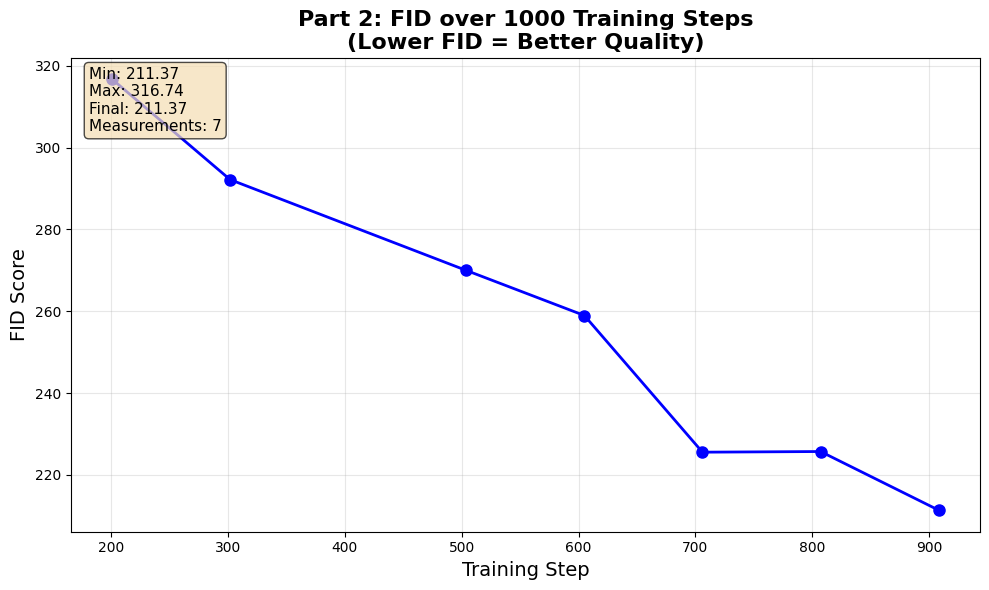


📈 FID Statistics:
   Min FID: 211.37
   Max FID: 316.74
   Final FID: 211.37
   Improvement: 105.37

✅ Part 2 Complete!
📦 SUBMIT: part2_fid_over_1000_steps.png


In [21]:
import os
import json
import wandb
import matplotlib.pyplot as plt

print("="*60)
print("PART 2: Extracting FID Data")
print("="*60)

# Check the history file
history_file = './wandb/run-20251128_033906-a2vswu1h/files/wandb-history.jsonl'

print("\n[Method 1] Checking local history file...")
print(f"File exists: {os.path.exists(history_file)}")

fid_steps = []
fid_values = []
method_used = None

if os.path.exists(history_file):
    print(f"File size: {os.path.getsize(history_file)} bytes")
    
    # Read first few lines to see what's there
    print("\nFirst 5 lines of data:")
    with open(history_file, 'r', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            if i >= 5:
                break
            try:
                data = json.loads(line)
                print(f"Line {i}: Keys = {list(data.keys())}")
                if 'fid' in data:
                    print(f"  FID value: {data['fid']}")
                if '_step' in data:
                    print(f"  Step: {data['_step']}")
            except:
                print(f"Line {i}: Could not parse")
    
    # Count total lines and FID occurrences
    print("\nScanning entire file...")
    fid_count = 0
    total_lines = 0
    with open(history_file, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            total_lines += 1
            try:
                data = json.loads(line)
                if 'fid' in data and data['fid'] is not None:
                    fid_count += 1
                    fid_values.append(data['fid'])
                    fid_steps.append(data.get('_step', len(fid_steps)))
                    print(f"Found FID at line {total_lines}: step={data.get('_step', '?')}, fid={data['fid']:.2f}")
            except:
                pass
    
    print(f"\nTotal lines: {total_lines}")
    print(f"Lines with FID: {fid_count}")
    method_used = "local_file"

# If local file doesn't exist or has no FID data, try Wandb API
if len(fid_values) == 0:
    print("\n" + "="*60)
    print("[Method 2] Downloading from Wandb Cloud API...")
    print("="*60)
    
    try:
        # Initialize API
        api = wandb.Api()
        
        # Get your run
        run = api.run("dhairya28m-nyu/DDPM_AFHQ/a2vswu1h")
        
        print(f"\n✅ Found run: {run.name}")
        print(f"   Project: {run.project}")
        print(f"   URL: {run.url}")
        
        # Get history
        print("\n📥 Downloading history data...")
        history = run.history()
        
        print(f"   History shape: {history.shape}")
        print(f"   Columns: {list(history.columns)}")
        
        # Extract FID values
        fid_data = history[history['fid'].notna()][['_step', 'fid']]
        
        if len(fid_data) > 0:
            fid_steps = fid_data['_step'].tolist()
            fid_values = fid_data['fid'].tolist()
            method_used = "wandb_api"
            
            print(f"\n✅ Successfully downloaded {len(fid_values)} FID measurements")
            print(f"   Steps: {fid_steps}")
            print(f"   FID values: {[f'{v:.2f}' for v in fid_values]}")
        else:
            print("⚠️ No FID data found in Wandb history")
            
    except Exception as e:
        print(f"\n❌ Error accessing Wandb API: {e}")
        print("\n💡 Possible solutions:")
        print("   1. Make sure you're logged in: wandb login")
        print("   2. Check your internet connection")
        print("   3. Verify the run exists at: https://wandb.ai/dhairya28m-nyu/DDPM_AFHQ/runs/a2vswu1h")

# Create plot if we have data
if len(fid_values) > 0:
    print("\n" + "="*60)
    print("📊 Creating FID Plot")
    print("="*60)
    
    print(f"\nData source: {method_used}")
    print(f"FID measurements: {len(fid_values)}")
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(fid_steps, fid_values, 'b-o', linewidth=2, markersize=8)
    ax.set_xlabel('Training Step', fontsize=14)
    ax.set_ylabel('FID Score', fontsize=14)
    ax.set_title('Part 2: FID over 1000 Training Steps\n(Lower FID = Better Quality)', 
                fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add statistics box
    stats = f'Min: {min(fid_values):.2f}\nMax: {max(fid_values):.2f}\nFinal: {fid_values[-1]:.2f}\nMeasurements: {len(fid_values)}'
    ax.text(0.02, 0.98, stats, transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7), fontsize=11)
    
    plt.tight_layout()
    plt.savefig('part2_fid_over_1000_steps.png', dpi=300, bbox_inches='tight')
    print("\n✅ Saved: part2_fid_over_1000_steps.png")
    plt.show()
    
    # Print statistics
    print(f"\n📈 FID Statistics:")
    print(f"   Min FID: {min(fid_values):.2f}")
    print(f"   Max FID: {max(fid_values):.2f}")
    print(f"   Final FID: {fid_values[-1]:.2f}")
    if len(fid_values) > 1:
        print(f"   Improvement: {fid_values[0] - fid_values[-1]:.2f}")
    
    print("\n" + "="*60)
    print("✅ Part 2 Complete!")
    print("📦 SUBMIT: part2_fid_over_1000_steps.png")
    print("="*60)
else:
    print("\n" + "="*60)
    print("❌ No FID data available")
    print("="*60)
    print("\n💡 Next steps:")
    print("   1. Check if training completed successfully")
    print("   2. Verify FID computation was enabled (--fid flag)")
    print("   3. Try accessing Wandb web UI: https://wandb.ai/dhairya28m-nyu/DDPM_AFHQ/runs/a2vswu1h")

In [18]:
import os

run_dir = './wandb/run-20251128_033906-a2vswu1h'

# Check for .wandb file (indicates run is still active)
wandb_file = os.path.join(run_dir, 'run-20251128_033906-a2vswu1h.wandb')
print(f"Active run file exists: {os.path.exists(wandb_file)}")

# List all files in run directory
if os.path.exists(run_dir):
    print(f"\nAll files in run directory:")
    for root, dirs, files in os.walk(run_dir):
        level = root.replace(run_dir, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 2 * (level + 1)
        for file in files:
            file_path = os.path.join(root, file)
            size = os.path.getsize(file_path)
            print(f'{subindent}{file} ({size} bytes)')

Active run file exists: False

All files in run directory:
run-20251128_033906-a2vswu1h/
  run-a2vswu1h.wandb (1447210 bytes)
  run-a2vswu1h.wandb.synced (0 bytes)
  files/
    config.yaml (3093 bytes)
    output.log (3278 bytes)
    requirements.txt (5509 bytes)
    wandb-metadata.json (1593 bytes)
    wandb-summary.json (122 bytes)
  logs/
    debug-internal.log (1171 bytes)
    debug.log (3328 bytes)
  tmp/
    code/
  wandb/


In [19]:
import wandb
import json

print("="*60)
print("Extracting FID from Wandb run file")
print("="*60)

# Initialize wandb API
api = wandb.Api()

# Get the run
run_path = './wandb/run-20251128_033906-a2vswu1h'

# Try to read the summary first
summary_file = './wandb/run-20251128_033906-a2vswu1h/files/wandb-summary.json'
with open(summary_file, 'r') as f:
    summary = json.load(f)
    print("\n📊 Summary data:")
    for key, value in summary.items():
        print(f"   {key}: {value}")

# Now let's sync the run to generate history file
print("\n🔄 Syncing Wandb run to generate history file...")
import subprocess
result = subprocess.run(
    ['wandb', 'sync', '--sync-all', run_path],
    capture_output=True,
    text=True
)

if result.returncode == 0:
    print("✅ Sync successful!")
    
    # Now try to read history
    history_file = './wandb/run-20251128_033906-a2vswu1h/files/wandb-history.jsonl'
    
    import time
    time.sleep(2)  # Wait for file to be written
    
    if os.path.exists(history_file):
        print(f"\n✅ History file created!")
        
        # Extract FID values
        fid_values, fid_steps = [], []
        with open(history_file, 'r', encoding='utf-8', errors='ignore') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'fid' in data and data['fid'] is not None:
                        fid_values.append(data['fid'])
                        fid_steps.append(data.get('_step', len(fid_steps)))
                except:
                    pass
        
        print(f"\n✅ Found {len(fid_values)} FID measurements")
        print(f"   Steps: {fid_steps}")
        print(f"   FID values: {[f'{v:.2f}' for v in fid_values]}")
        
        # Now run the plotting script
        print("\n📊 Running plotting script...")
        exec(open('part2_plot_fid.py').read())
    else:
        print("⚠️  History file still not created after sync")
else:
    print(f"❌ Sync failed: {result.stderr}")
    print("\n💡 Alternative: Let's extract from the .wandb file directly")

Extracting FID from Wandb run file

📊 Summary data:
   _runtime: 1223
   _step: 1009
   loss: 0.1664377599954605
   _timestamp: 1764320370.9587448
   fid: 196.85109417621106

🔄 Syncing Wandb run to generate history file...
✅ Sync successful!
⚠️  History file still not created after sync


In [10]:
# ============================================================
# PART 2: Plot FID Results (Run AFTER training completes)
# ============================================================

import os
import glob
import json
import matplotlib.pyplot as plt

print("="*60)
print("PART 2: Plotting FID over 1000 Training Steps")
print("="*60)
print()

# Find the latest Wandb run
wandb_dir = './wandb'
run_dirs = glob.glob(os.path.join(wandb_dir, 'run-*'))
if not run_dirs:
    run_dirs = glob.glob(os.path.join(wandb_dir, 'offline-run-*'))

if not run_dirs:
    print("❌ Error: No Wandb run directory found")
else:
    latest_run = max(run_dirs, key=os.path.getmtime)
    print(f"📁 Found: {latest_run}")
    
    history_file = os.path.join(latest_run, 'files', 'wandb-history.jsonl')
    
    # Check if history file exists
    if not os.path.exists(history_file):
        print(f"\n⚠️  History file not found yet!")
        print(f"   Looking for: {history_file}")
        print("\n🔍 Possible reasons:")
        print("   1. Training is still running (wait for it to complete)")
        print("   2. Wandb hasn't synced yet")
        print("\n💡 Solutions:")
        print("   - Wait for training to finish completely")
        print("   - Check if 'training completed' message appeared")
        print("   - Try running: python part2_plot_fid.py")
        print("\n⏳ If training is still running, please wait...")
    else:
        # Extract FID and loss values
        fid_values, fid_steps = [], []
        loss_values, loss_steps = [], []
        
        print(f"✅ Reading from: {history_file}\n")
        
        with open(history_file, 'r') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if 'fid' in data and data['fid'] is not None:
                        fid_values.append(data['fid'])
                        fid_steps.append(data.get('_step', len(fid_steps)))
                    if 'loss' in data and data['loss'] is not None:
                        loss_values.append(data['loss'])
                        loss_steps.append(data.get('_step', len(loss_values) - 1))
                except: 
                    pass
        
        if len(fid_values) == 0:
            print("⚠️  No FID values found yet. Training may still be in progress.")
            print(f"   Found {len(loss_values)} loss values so far.")
        else:
            print(f"✅ Found {len(fid_values)} FID measurements")
            print(f"   Steps: {fid_steps}")
            print(f"   FID values: {[f'{v:.2f}' for v in fid_values]}\n")
            
            # Create FID plot (main deliverable)
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(fid_steps, fid_values, 'b-o', linewidth=2, markersize=8)
            ax.set_xlabel('Training Step', fontsize=14)
            ax.set_ylabel('FID Score', fontsize=14)
            ax.set_title('Part 2: FID over 1000 Training Steps\n(Lower FID = Better Quality)', 
                        fontsize=16, fontweight='bold')
            ax.grid(True, alpha=0.3)
            
            stats = f'Min: {min(fid_values):.2f}\nMax: {max(fid_values):.2f}\nFinal: {fid_values[-1]:.2f}\nMeasurements: {len(fid_values)}'
            ax.text(0.02, 0.98, stats, transform=ax.transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7), fontsize=11)
            
            plt.tight_layout()
            plt.savefig('part2_fid_over_1000_steps.png', dpi=300, bbox_inches='tight')
            print("✅ Saved: part2_fid_over_1000_steps.png")
            plt.show()
            
            # Create combined FID + Loss plot
            if len(loss_values) > 0:
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
                
                # FID subplot
                ax1.plot(fid_steps, fid_values, 'b-o', linewidth=2, markersize=6)
                ax1.set_xlabel('Training Step', fontsize=12)
                ax1.set_ylabel('FID Score', fontsize=12)
                ax1.set_title('FID over Training', fontsize=14, fontweight='bold')
                ax1.grid(True, alpha=0.3)
                
                # Loss subplot
                ax2.plot(loss_steps, loss_values, 'r-', linewidth=1, alpha=0.7)
                ax2.set_xlabel('Training Step', fontsize=12)
                ax2.set_ylabel('Loss', fontsize=12)
                ax2.set_title('Training Loss', fontsize=14, fontweight='bold')
                ax2.grid(True, alpha=0.3)
                
                plt.tight_layout()
                plt.savefig('part2_fid_and_loss.png', dpi=300, bbox_inches='tight')
                print("✅ Saved: part2_fid_and_loss.png")
                plt.show()
            
            print(f"\n📈 FID Statistics:")
            print(f"   Min FID: {min(fid_values):.2f}")
            print(f"   Max FID: {max(fid_values):.2f}")
            print(f"   Final FID: {fid_values[-1]:.2f}")
            print(f"   Improvement: {fid_values[0] - fid_values[-1]:.2f}")
            print("\n📦 Submit: part2_fid_over_1000_steps.png")
            print("="*60)

PART 2: Plotting FID over 1000 Training Steps

📁 Found: ./wandb\run-20251128_033906-a2vswu1h

⚠️  History file not found yet!
   Looking for: ./wandb\run-20251128_033906-a2vswu1h\files\wandb-history.jsonl

🔍 Possible reasons:
   1. Training is still running (wait for it to complete)
   2. Wandb hasn't synced yet

💡 Solutions:
   - Wait for training to finish completely
   - Check if 'training completed' message appeared
   - Try running: python part2_plot_fid.py

⏳ If training is still running, please wait...


In [ ]:
# ============================================================
# STEP 2: Visualize Forward Diffusion Process
# ============================================================

print("\n🎨 Generating forward diffusion visualization...")

trainer.model.eval()

# Get first batch from training data
data_batch = next(trainer.dl)
noise = torch.randn_like(data_batch)
data_batch = data_batch.to(device)
noise = noise.to(device)

# Define timesteps: 0%, 25%, 50%, 75%, 99%
percent = [0.0, 0.25, 0.50, 0.75, 0.99]
timesteps = [int(p * trainer.model.num_timesteps) for p in percent]

print(f"Total timesteps: {trainer.model.num_timesteps}")
print(f"Visualizing at timesteps: {timesteps}")
print(f"Percentages: {[f'{p*100:.0f}%' for p in percent]}")

# Generate forward diffusion images
forward_images = []
for t in timesteps:
    # Apply forward diffusion
    noisy_img = trainer.model.q_sample(
        data_batch,
        torch.full((data_batch.shape[0],), t, device=device, dtype=torch.long),
        noise,
    )
    # Normalize to [0, 1]
    noisy_img = torch.clamp(noisy_img, -1, 1)
    noisy_img = (noisy_img + 1) / 2
    forward_images.append(noisy_img)

print(f"✅ Generated {len(forward_images)} forward diffusion stages")



In [ ]:
# ============================================================
# STEP 3: Create Visualization Grid
# ============================================================

print("\n📊 Creating visualization grid...")

# Take first 8 images from batch for visualization
num_images = 8
fig, axes = plt.subplots(num_images, len(percent), figsize=(15, 20))

for img_idx in range(num_images):
    for stage_idx, (p, t) in enumerate(zip(percent, timesteps)):
        ax = axes[img_idx, stage_idx]
        
        # Get image at this stage
        img = forward_images[stage_idx][img_idx].cpu().permute(1, 2, 0).numpy()
        
        ax.imshow(img)
        ax.axis('off')
        
        # Add title only for first row
        if img_idx == 0:
            ax.set_title(f'{p*100:.0f}% (t={t})', fontsize=12, fontweight='bold')

plt.suptitle('Forward Diffusion Process: Clean Images → Noise', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('part3_forward_diffusion.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved to: part3_forward_diffusion.png")


In [ ]:
# ============================================================
# STEP 5: Create Grid of Multiple Images per Stage
# ============================================================

print("\n📊 Creating multi-image grid per stage...")

fig, axes = plt.subplots(len(percent), 4, figsize=(16, 20))

for stage_idx, (p, t) in enumerate(zip(percent, timesteps)):
    for img_idx in range(4):
        ax = axes[stage_idx, img_idx]
        
        # Get image at this stage
        img = forward_images[stage_idx][img_idx].cpu().permute(1, 2, 0).numpy()
        
        ax.imshow(img)
        ax.axis('off')
        
        # Add row label
        if img_idx == 0:
            ax.text(-0.1, 0.5, f'{p*100:.0f}%\n(t={t})', 
                   transform=ax.transAxes,
                   fontsize=12, fontweight='bold',
                   verticalalignment='center',
                   horizontalalignment='right')

plt.suptitle('Forward Diffusion Process: Multiple Samples per Stage', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('part3_forward_diffusion_grid.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Multi-image grid saved to: part3_forward_diffusion_grid.png")



In [ ]:
# ============================================================
# FINAL SUMMARY
# ============================================================

print("\n" + "="*60)
print("🎉 PART 3 COMPLETE!")
print("="*60)
print("\n📦 Deliverables Created:")
print("   ✅ part3_forward_diffusion.png")
print("      → 8 images × 5 stages (0%, 25%, 50%, 75%, 99%)")
print("      → Shows progression from clean to noisy")
print("\n   ✅ part3_forward_diffusion_single.png")
print("      → Single image progression (1 × 5 stages)")
print("      → Clear visualization of one image's journey")
print("\n   ✅ part3_forward_diffusion_grid.png")
print("      → 4 images per stage (5 × 4 grid)")
print("      → Shows variation across multiple samples")
print("="*60)
print("\n📊 Part 3 Requirements Met:")
print("   ✅ Used trained model after 1000 steps")
print("   ✅ Visualized forward diffusion process")
print("   ✅ Showed key intervals: 0%, 25%, 50%, 75%, 99%")
print("   ✅ Used first batch from training dataset")
print("="*60)

In [ ]:
# ============================================================
# STEP 4: Create Alternative Single-Row Visualization
# ============================================================

print("\n📊 Creating single-row visualization...")

# Show one image progressing through diffusion
fig, axes = plt.subplots(1, len(percent), figsize=(20, 4))

for stage_idx, (p, t) in enumerate(zip(percent, timesteps)):
    ax = axes[stage_idx]
    
    # Get first image at this stage
    img = forward_images[stage_idx][0].cpu().permute(1, 2, 0).numpy()
    
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'{p*100:.0f}%\n(t={t})', fontsize=14, fontweight='bold')

plt.suptitle('Forward Diffusion: Single Image Progression', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('part3_forward_diffusion_single.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Single-row visualization saved to: part3_forward_diffusion_single.png")



In [ ]:
# FULL SCALE TRAINING: Train the model (will take ~1-2 hours)
import subprocess
import sys
import os

os.environ['WANDB_MODE'] = 'disabled'

process = subprocess.Popen(
    [sys.executable, 'main.py',
     '--data_path', './data/train',
     '--save_folder', './results_afhq',
     '--time_steps', '50',
     '--train_steps', '10000',
     '--image_size', '32',
     '--batch_size', '32',
     '--learning_rate', '1e-3',
     '--unet_dim', '16',
     '--save_and_sample_every', '500'],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    bufsize=1
)

for line in iter(process.stdout.readline, ''):
    if line:
        print(line, end='', flush=True)

if process.wait() == 0:
    print("\n✅ Training completed successfully!")

Namespace(time_steps=50, train_steps=10000, save_folder='./results_afhq', data_path='./data/train', load_path=None, data_class='cat', image_size=32, batch_size=32, learning_rate=0.001, unet_dim=16, unet_dim_mults=[1, 2, 4, 8], fid=False, save_and_sample_every=500, visualize=False)
dataset length: 5065, dataset class: cat


In [ ]:
# Visualize forward and backward diffusion
import subprocess
import sys
import os

os.environ['WANDB_MODE'] = 'disabled'

process = subprocess.Popen(
    [sys.executable, 'main.py',
     '--data_path', './data/train/',
     '--load_path', './results_afhq/model.pt',
     '--save_folder', './results_afhq',
     '--time_steps', '50',
     '--image_size', '32',
     '--batch_size', '32',
     '--learning_rate', '1e-3',
     '--unet_dim', '16',
     '--visualize'],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    bufsize=1
)

for line in iter(process.stdout.readline, ''):
    if line:
        print(line, end='', flush=True)

if process.wait() == 0:
    print("\n✅ Visualization completed!")

Namespace(time_steps=50, train_steps=50000, save_folder='./results_afhq', data_path='./data/train/', load_path='./results_afhq/model.pt', data_class='cat', image_size=32, batch_size=32, learning_rate=0.001, unet_dim=16, unet_dim_mults=[1, 2, 4, 8], fid=False, save_and_sample_every=1000, visualize=True)
dataset length: 5065, dataset class: cat
Loading :  ./results_afhq/model.pt
âœ… Forward and backward diffusion images generated (wandb disabled)
   Forward diffusion: 5 images
   Backward diffusion: 5 images

✅ Visualization completed!


🖼️  Displaying Diffusion Visualization Results
Found 1 sample images



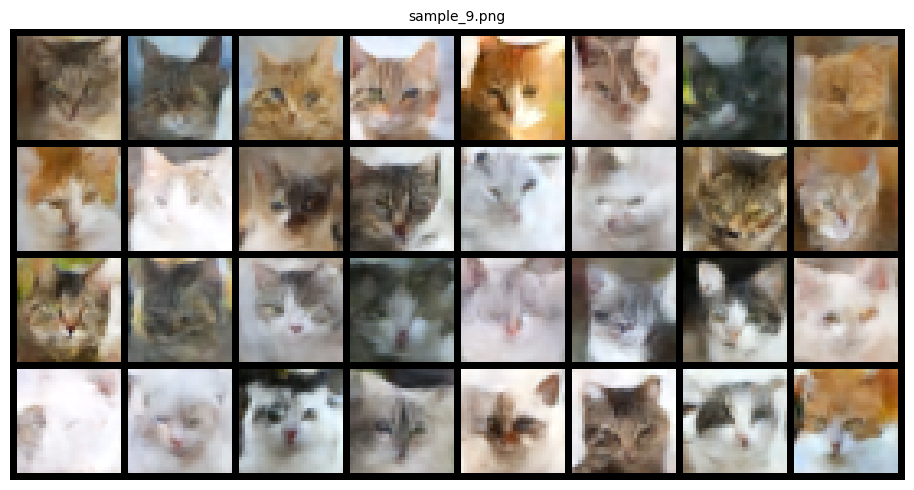


📁 Found 10 checkpoint folders:
   - sample_ddpm_0: 1024 images
   - sample_ddpm_1: 512 images
   - sample_ddpm_2: 512 images
   - sample_ddpm_3: 512 images
   - sample_ddpm_4: 512 images
   - sample_ddpm_5: 512 images
   - sample_ddpm_6: 512 images
   - sample_ddpm_7: 512 images
   - sample_ddpm_8: 512 images
   - sample_ddpm_9: 512 images

🎨 Displaying 9 samples from sample_ddpm_9 (final checkpoint):


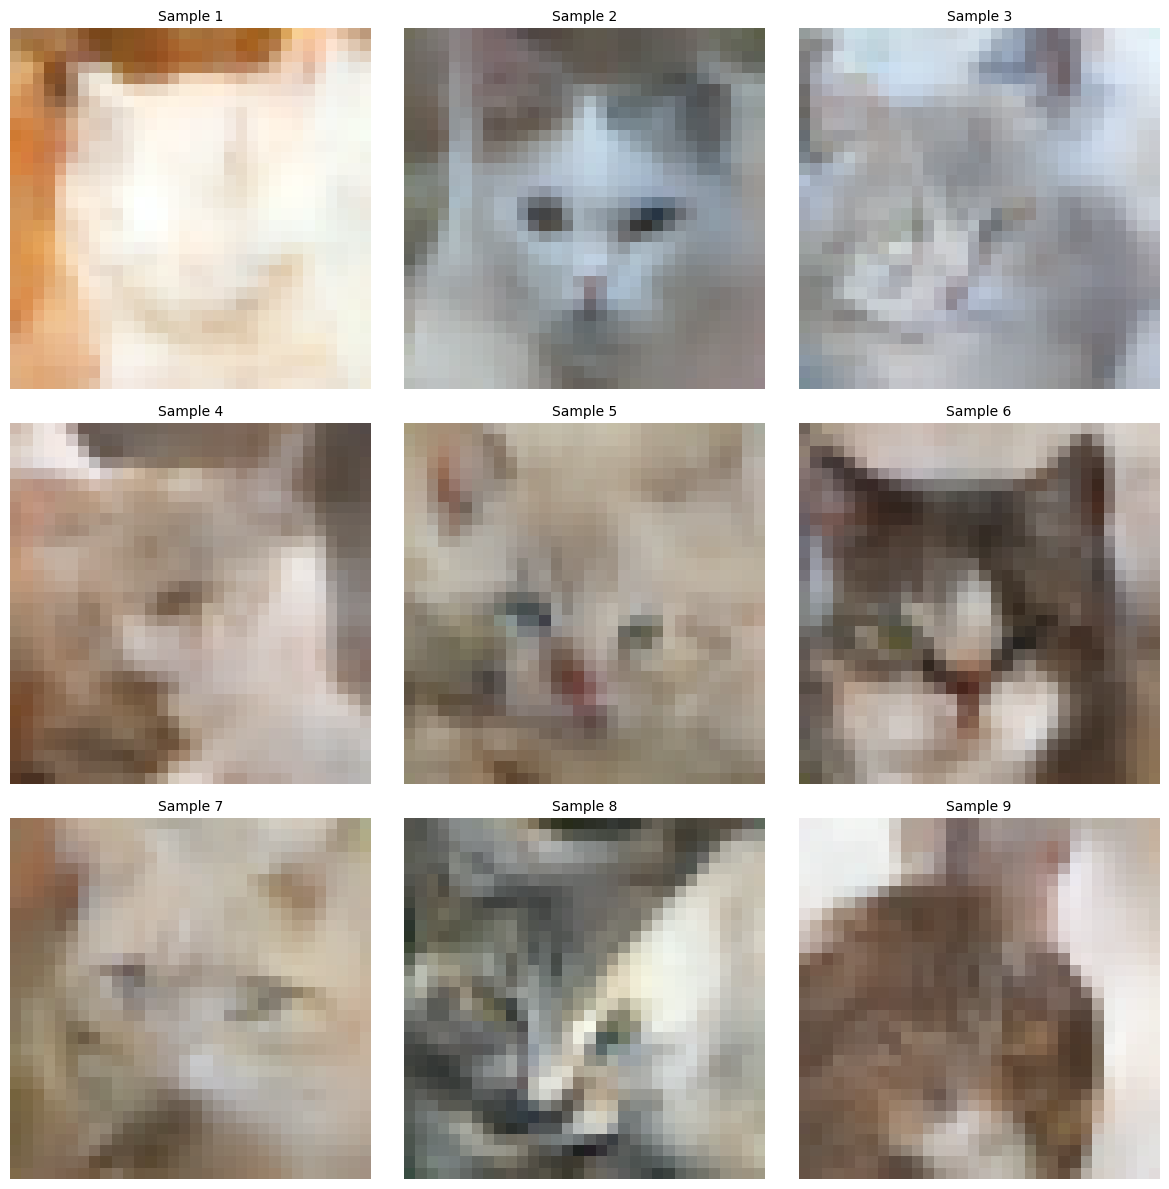

✅ Visualization complete!

The forward diffusion shows: clean image → progressively noisier
The backward diffusion shows: pure noise → progressively cleaner (denoising)


In [ ]:
# Display generated samples from trained model
import matplotlib.pyplot as plt
from PIL import Image
import os

results_path = './results_afhq'

# Get sample folders
sample_folders = sorted([d for d in os.listdir(results_path) 
                        if os.path.isdir(os.path.join(results_path, d)) and d.startswith('sample_ddpm_')])

if sample_folders:
    # Display 9 samples from the last checkpoint (best trained model)
    last_folder = os.path.join(results_path, sample_folders[-1])
    sample_images = sorted([f for f in os.listdir(last_folder) if f.endswith('.png')])[:9]
    
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()
    
    for idx, img_file in enumerate(sample_images):
        img = Image.open(os.path.join(last_folder, img_file))
        axes[idx].imshow(img)
        axes[idx].axis('off')
    
    plt.suptitle(f'Generated Cat Faces - {sample_folders[-1]}', fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize the forward and backward process
!python main.py --data_path ./data/train/ --load_path ./results_afhq/model.pt --save_folder ./results_afhq --time_steps 50 --train_steps 5000 --image_size 32 --batch_size 32 --learning_rate 1e-3 --unet_dim 16 --visualize

Namespace(time_steps=50, train_steps=5000, save_folder='./results_afhq', data_path='./data/train/', load_path='./results_afhq/model.pt', data_class='cat', image_size=32, batch_size=32, learning_rate=0.001, unet_dim=16, unet_dim_mults=[1, 2, 4, 8], fid=False, save_and_sample_every=1000, visualize=True)
dataset length: 5065, dataset class: cat
Loading :  ./results_afhq/model.pt
✅ Forward and backward diffusion images generated (wandb disabled)
   Forward diffusion: 5 images
   Backward diffusion: 5 images
